<a href="https://colab.research.google.com/github/Swaroopa-la/Embedded-DS-project-Practice/blob/main/Activity_1_Data_Loading_and_Exploration_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Initializing the analysis by loading and exploring the dataset, ensuring data
integrity and format consistency for accurate downstream analysis.
1.Load the COVID-19 DataFrame using pandas from the provided dataset files. """

import pandas as pd
import matplotlib.pyplot as plt
print("Load the COVID-19 DataFrame using pandas from the provided dataset files.")
CovidData = pd.read_csv("https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0525-15Jul2025E+type@asset+block/owid-covid-data.csv") # Original Data kept for Reference
CovidDatam = CovidData.copy() # Create a copy to work with
print(CovidData.info())

Load the COVID-19 DataFrame using pandas from the provided dataset files.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358838 entries, 0 to 358837
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    358838 non-null  object 
 1   continent                                   341730 non-null  object 
 2   location                                    358838 non-null  object 
 3   date                                        358838 non-null  object 
 4   total_cases                                 320628 non-null  float64
 5   new_cases                                   349032 non-null  float64
 6   new_cases_smoothed                          347773 non-null  float64
 7   total_deaths                                299086 non-null  float64
 8   new_deaths                                  349089 non-null  float64
 

In [ ]:
"""2.	Display the first 5 rows of the DataFrame.  """
print("Display the first 5 of the DataFrame.  ")
print(CovidData.head(5))


Display the first 5 of the DataFrame.  
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per

In [ ]:
"""2.	Display the last 5 rows of the DataFrame.  """
print("Display the last 5 rows of the DataFrame.  ")
print(CovidData.tail(5))

Display the last 5 rows of the DataFrame.  
       iso_code continent  location        date  total_cases  new_cases  \
358833      ZWE    Africa  Zimbabwe  2023-11-18     265890.0        0.0   
358834      ZWE    Africa  Zimbabwe  2023-11-19     265890.0        0.0   
358835      ZWE    Africa  Zimbabwe  2023-11-20     265890.0        0.0   
358836      ZWE    Africa  Zimbabwe  2023-11-21     265890.0        0.0   
358837      ZWE    Africa  Zimbabwe  2023-11-22     265890.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
358833                 0.0        5725.0         0.0                  0.0   
358834                 0.0        5725.0         0.0                  0.0   
358835                 0.0        5725.0         0.0                  0.0   
358836                 0.0        5725.0         0.0                  0.0   
358837                 0.0        5725.0         0.0                  0.0   

        ...  male_smokers  handwashing_fac

In [ ]:
"""3.Check for missing values in the dataset and decide on a strategy to handle them. """

print("Check for missing values in the dataset and decide on a strategy to handle them. ")
print(CovidData.isnull().sum())  # count missing values in each column
#CovidDatam = CovidData.fillna(0) #Replace missing values with 0 or unknown
print(CovidDatam)
#print(CovidData.shape)


Check for missing values in the dataset and decide on a strategy to handle them. 
iso_code                                        0
continent                                   17108
location                                        0
date                                            0
total_cases                                 38210
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 67, dtype: int64
       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afgh

In [ ]:
"""4.Remove the columns with more than 90% of missing values."""
print("Remove the columns with more than 90% of missing values.")
missing_threshold=0.9 # set the threshold for missing values
CovidDatam = CovidDatam.dropna(thresh=(1-missing_threshold)*len(CovidDatam), axis=1) # drop columns with more than the threshold of missing values

# Print columns that were dropped
missing_percent = CovidData.isnull().mean() * 100
dropped_columns = missing_percent[missing_percent > 90].index.tolist()
print("Dropped columns (more than 90% missing):")
print(dropped_columns)

Remove the columns with more than 90% of missing values.
Dropped columns (more than 90% missing):
['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million']


In [ ]:
"""5.Convert the 'date' column to the datetime data type. """
print("5.Convert the 'date' column to the datetime data type.")
CovidDatam['date'] = pd.to_datetime(CovidDatam['date'])
print(CovidDatam['date'].dtypes)

5.Convert the 'date' column to the datetime data type.
datetime64[ns]


In [ ]:
"""Activity 2: Data Cleaning and Feature Engineering
 Enhancing data relevance and structure, enabling focused analysis on key COVID-19 indicators and demographic factors. """
 # 1.   Impute missing values in the dataset columns
print("1.      Impute missing values in the dataset columns" )

# Impute missing numerical values with the median and object types with 'Unknown'
for col in CovidDatam.columns:
    # Check if the column is numerical (int64 or float64)
    if CovidDatam[col].dtype in ['int64', 'float64']:
        # Fill missing numerical values with the median of the column
        CovidDatam[col] = CovidDatam[col].fillna(CovidDatam[col].median())
    # Check if the column is of object type (likely strings)
    elif CovidDatam[col].dtype == 'object':
        # Fill missing object type values with the string 'Unknown'
        CovidDatam[col] = CovidDatam[col].fillna('Unknown')

# Print the count of missing values after imputation to verify
print(CovidDatam.isnull().sum())

1.      Impute missing values in the dataset columns
iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                      

In [ ]:
# Save the DataFrame to a CSV file
CovidDatam.to_csv('covid_data_cleaned.csv', index=False)

In [ ]:
print(CovidData.isnull().sum())
print(CovidDatam.shape)
print(CovidDatam.describe())


iso_code                                        0
continent                                   17108
location                                        0
date                                            0
total_cases                                 38210
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 67, dtype: int64
(358838, 59)
                                date   total_cases     new_cases  \
count                         358838  3.588380e+05  3.588380e+05   
mean   2021-12-13 02:07:44.178264576  6.139434e+06  9.119328e+03   
min              2020-01-01 00:00:00  1.000000e+00  0.000000e+00   
25%              2020-12-25 00:00:00  1.114400e+04  0.000000e+00   
50%              2021-12-13 00:00:00  7.271900e+04  1.000000e+00   
75% 

In [ ]:
"""
    Activity 2: Data Cleaning and Feature Engineering
2.      2 Remove duplicate rows from the DataFrame.  """
print("Remove duplicate rows from the DataFrame")
# Print the number of rows before dropping duplicates
print("Number of rows before dropping duplicates:", CovidDatam.shape[0])
CovidDatam = CovidDatam.drop_duplicates()
# Print the number of rows after dropping duplicates
print("Number of rows after dropping duplicates:", CovidDatam.shape[0])
print(CovidDatam.shape)

Remove duplicate rows from the DataFrame
Number of rows before dropping duplicates: 358838
Number of rows after dropping duplicates: 358838
(358838, 59)


In [ ]:
"""
    Activity 2: Data Cleaning and Feature Engineering
2.      3.	Create new features if needed (e.g., extract year and month from the 'date' column).   """
print("3.Create new features if needed e.g., extract year and month from the 'date' column")
CovidDatam['year'] = CovidDatam['date'].dt.year
print(CovidDatam['year'])
CovidDatam['month'] = CovidDatam['date'].dt.month
print(CovidDatam['month'])

3.Create new features if needed e.g., extract year and month from the 'date' column
0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
358833    2023
358834    2023
358835    2023
358836    2023
358837    2023
Name: year, Length: 358838, dtype: int32
0          1
1          1
2          1
3          1
4          1
          ..
358833    11
358834    11
358835    11
358836    11
358837    11
Name: month, Length: 358838, dtype: int32


In [ ]:
"""
    Activity 2: Data Cleaning and Feature Engineering
2.      4.	Explore unique countries in the dataset and count the total number of countries.  .   """
print("Explore unique countries in the dataset and count the total number of countries.  ")
print("unique countries in the dataset:" , CovidDatam['location'].unique())
print("total number of countries:", CovidDatam['location'].nunique())

Explore unique countries in the dataset and count the total number of countries.  
unique countries in the dataset: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 

1.       Visualize the WHO Regions (Continent column in dataset) with total COVID-19 cases and total deaths by using bar plots  


<Figure size 2000x1800 with 0 Axes>

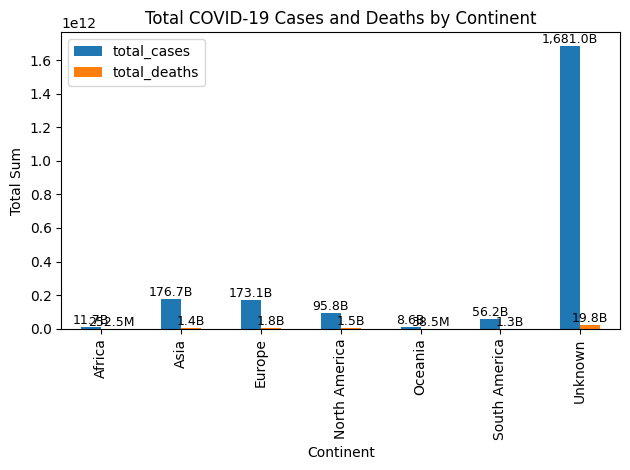

In [ ]:
""" Activity 3: Worldwide COVID-19 Overview
Providing a global and temporal perspective on COVID-19, identifying patterns and correlations crucial for strategic decision-making.  """
# 3.1.  Visualize the WHO Regions (Continent column in dataset) with total COVID-19 cases and total deaths by using bar plots.

print("1.       Visualize the WHO Regions (Continent column in dataset) with total COVID-19 cases and total deaths by using bar plots  ")
plt.figure(figsize=(20, 18)) # Create a figure for the plot with a specified size

# Ensure 'total_cases' and 'total_deaths' are numeric and handle potential non-numeric entries
CovidDatam['total_cases'] = pd.to_numeric(CovidDatam['total_cases'], errors='coerce')
CovidDatam['total_deaths'] = pd.to_numeric(CovidDatam['total_deaths'], errors='coerce')

# Fill any resulting NaNs with the median
CovidDatam['total_cases'] = CovidDatam['total_cases'].fillna(CovidDatam['total_cases'].median())
CovidDatam['total_deaths'] = CovidDatam['total_deaths'].fillna(CovidDatam['total_deaths'].median())

# Group by continent, sum cases and deaths, and store the result
continent_summary = CovidDatam.groupby('continent')[['total_cases', 'total_deaths']].sum()

ax = continent_summary.plot(kind='bar') # Create a bar plot from the summary

plt.xlabel('Continent') # Set the label for the x-axis
plt.ylabel('Total Sum') # Set the label for the y-axis
plt.title('Total COVID-19 Cases and Deaths by Continent') # Set the title of the plot

# Add labels to the bars with conditional formatting (Millions or Billions)
for container in ax.containers:
    for rect in container.patches:
        height = rect.get_height()
        if height >= 1_000_000_000: # If value is 1 billion or more
            label = f'{height/1_000_000_000:,.1f}B' # Format in Billions
        elif height >= 1_000_000: # If value is 1 million or more
            label = f'{height/1_000_000:,.1f}M' # Format in Millions
        else:
            label = f'{height:,.0f}' # Format smaller values as whole numbers with commas

        ax.text(rect.get_x() + rect.get_width()/2., height,
                label,
                ha='center', va='bottom', fontsize=9)


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

Explore the world wide monthly trend of  COVID-19 cases using a line plot. 


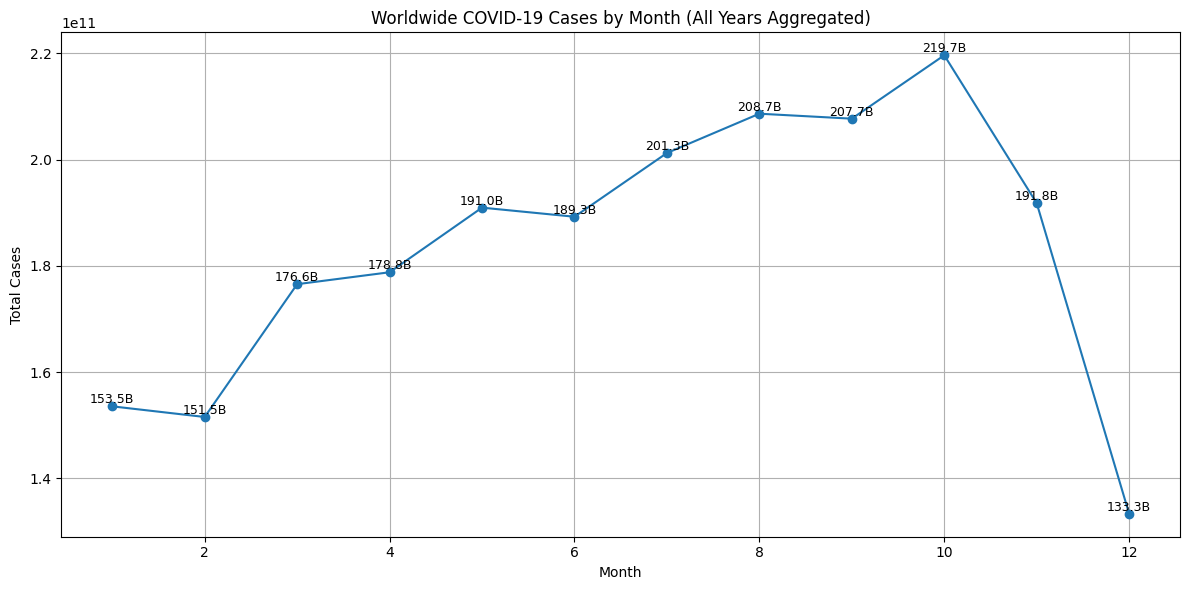

In [ ]:
""" Activity 3: Worldwide COVID-19 Overview
Providing a global and temporal perspective on COVID-19, identifying patterns and correlations crucial for strategic decision-making.  """
#3.2. Explore the world wide monthly trend of  COVID-19 cases using a line plot.
print("Explore the world wide monthly trend of  COVID-19 cases using a line plot. ")
plt.figure(figsize=(12, 6)) # Create a figure for the plot with a specified size

# Convert 'total_cases' to numeric, coercing errors, then fill NaNs with median before summing
CovidDatam['total_cases'] = pd.to_numeric(CovidDatam['total_cases'], errors='coerce') # Convert 'total_cases' to numeric, replacing errors with NaN
CovidDatam['total_cases'] = CovidDatam['total_cases'].fillna(CovidDatam['total_cases'].median()) # Fill resulting NaNs with the median of the column

# Group by month, sum cases, and store the result (Aggregates data across all years)
monthly_cases = CovidDatam.groupby('month')['total_cases'].sum()

ax = monthly_cases.plot(kind='line', marker='o') # Create a line plot from the summary

plt.xlabel('Month') # Set the label for the x-axis
plt.ylabel('Total Cases') # Set the label for the y-axis
plt.title('Worldwide COVID-19 Cases by Month (All Years Aggregated)') # Set the title of the plot and indicate aggregation
plt.grid(True) # Add a grid to the plot

# Add labels to the data points with conditional formatting (Millions or Billions)
for x, y in zip(monthly_cases.index, monthly_cases.values):
    if y >= 1_000_000_000: # If value is 1 billion or more
        label = f'{y/1_000_000_000:,.1f}B' # Format in Billions
    elif y >= 1_000_000: # If value is 1 million or more
        label = f'{y/1_000_000:,.1f}M' # Format in Millions
    else:
        label = f'{y:,.0f}' # Format smaller values as whole numbers with commas

    ax.text(x, y, label, ha='center', va='bottom', fontsize=9)


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

Explore the worldwide monthly trend of COVID-19 cases and deaths for a specific year.


<Figure size 1200x600 with 0 Axes>

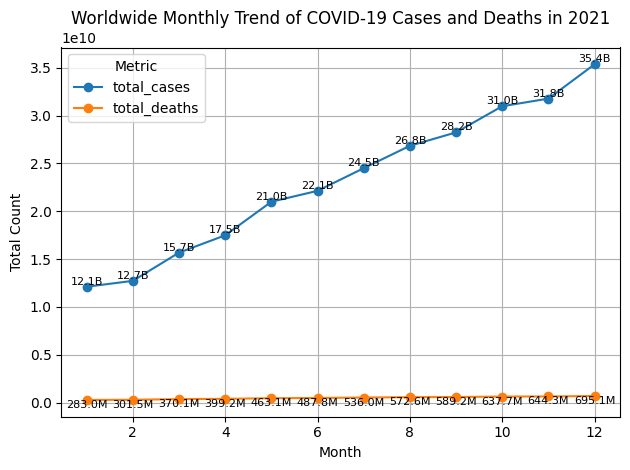

In [ ]:
"""Activity 3: Worldwide COVID-19 Overview - Monthly Trend for a Specific Year"""
# Visualize the worldwide monthly trend of COVID-19 cases and deaths for a specific year.
print("Explore the worldwide monthly trend of COVID-19 cases and deaths for a specific year.")

# Specify the year you want to analyze
analysis_year = 2021 # You can change this year to any year present in your dataset (e.g., 2020, 2021, 2022, 2023)

# Filter the DataFrame for the specified year
df_one_year = CovidDatam[CovidDatam['year'] == analysis_year].copy()

# Ensure 'total_cases' and 'total_deaths' are numeric and handle potential non-numeric entries
df_one_year['total_cases'] = pd.to_numeric(df_one_year['total_cases'], errors='coerce')
df_one_year['total_deaths'] = pd.to_numeric(df_one_year['total_deaths'], errors='coerce')

# Fill any resulting NaNs with the median for this year's data
df_one_year['total_cases'] = df_one_year['total_cases'].fillna(df_one_year['total_cases'].median())
df_one_year['total_deaths'] = df_one_year['total_deaths'].fillna(df_one_year['total_deaths'].median())


# Group by month and sum cases and deaths for the specified year
monthly_trend_one_year = df_one_year.groupby('month')[['total_cases', 'total_deaths']].sum()

plt.figure(figsize=(12, 6)) # Create a figure for the plot
ax = monthly_trend_one_year.plot(kind='line', marker='o') # Create line plots for cases and deaths

plt.xlabel('Month') # Set the label for the x-axis
plt.ylabel('Total Count') # Set the label for the y-axis
plt.title(f'Worldwide Monthly Trend of COVID-19 Cases and Deaths in {analysis_year}') # Set the title with the specified year
plt.grid(True) # Add a grid

# Add labels to the data points with conditional formatting (Millions or Billions) - for cases and deaths lines
for i, line in enumerate(ax.lines):
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        if y_val >= 1_000_000_000: # If value is 1 billion or more
            label = f'{y_val/1_000_000_000:,.1f}B' # Format in Billions
        elif y_val >= 1_000_000: # If value is 1 million or more
            label = f'{y_val/1_000_000:,.1f}M' # Format in Millions
        else:
            label = f'{y_val:,.0f}' # Format smaller values as whole numbers with commas

        # Adjust vertical alignment slightly for better readability
        va = 'bottom' if i == 0 else 'top' # Adjust alignment based on the line (cases vs deaths)

        ax.text(x_val, y_val, label, ha='center', va=va, fontsize=8)


plt.legend(title='Metric') # Add a legend
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

Investigate the correlation between total cases and total deaths using a heatmap..  


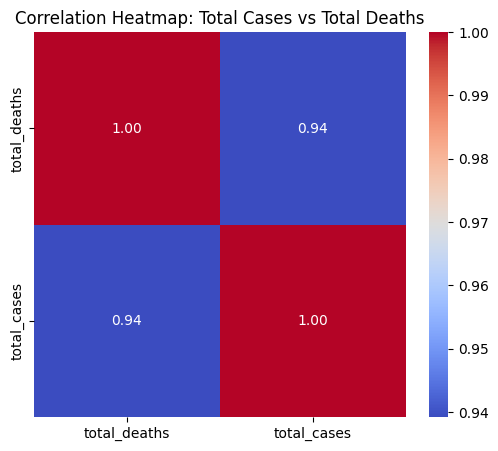

In [ ]:
#3.3    Investigate the correlation between total cases and total deaths using a heatmap..
print("Investigate the correlation between total cases and total deaths using a heatmap..  ")

import seaborn as sns # Ensure seaborn is imported

# Select the columns for correlation and ensure they are numeric
correlation_data = CovidDatam[['total_deaths', 'total_cases']].copy()
correlation_data['total_deaths'] = pd.to_numeric(correlation_data['total_deaths'], errors='coerce')
correlation_data['total_cases'] = pd.to_numeric(correlation_data['total_cases'], errors='coerce')
correlation_data = correlation_data.fillna(correlation_data.median()) # Fill any NaNs resulting from coercion


# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(6, 5)) # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Use sns.heatmap and format annotations
plt.title('Correlation Heatmap: Total Cases vs Total Deaths')
plt.show()

Analyze how total cases have evolved over time for a specific location (e.g., Singapore).  


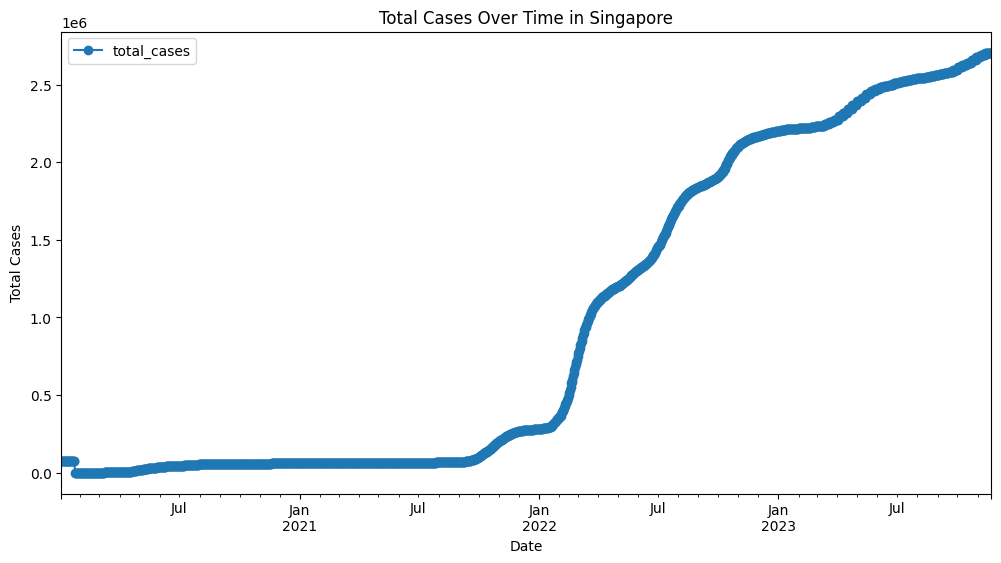

In [ ]:
"""4.   Analyze how total cases have evolved over time for a specific location (e.g., India).  """
print("Analyze how total cases have evolved over time for a specific location (e.g., Singapore).  ") # Update print statement
plt.figure(figsize=(12, 6)) # Create a figure for the plot with a specified size

# Filter data for Singapore and plot 'total_cases' over 'date'
singapore_data = CovidDatam[CovidDatam['location'] == 'Singapore'].copy() # filter to Singapore

# Create the line plot
ax = singapore_data.plot(x='date', y='total_cases', ax=plt.gca(), marker='o', linestyle='-') # Use singapore_data


plt.xlabel('Date') # Set the label for the x-axis
plt.ylabel('Total Cases') # Set the label for the y-axis
plt.title('Total Cases Over Time in Singapore') # Update the title of the plot



plt.show() # Display the plot

1.	Create a grouped bar chart to visualize new cases by continent and month. 


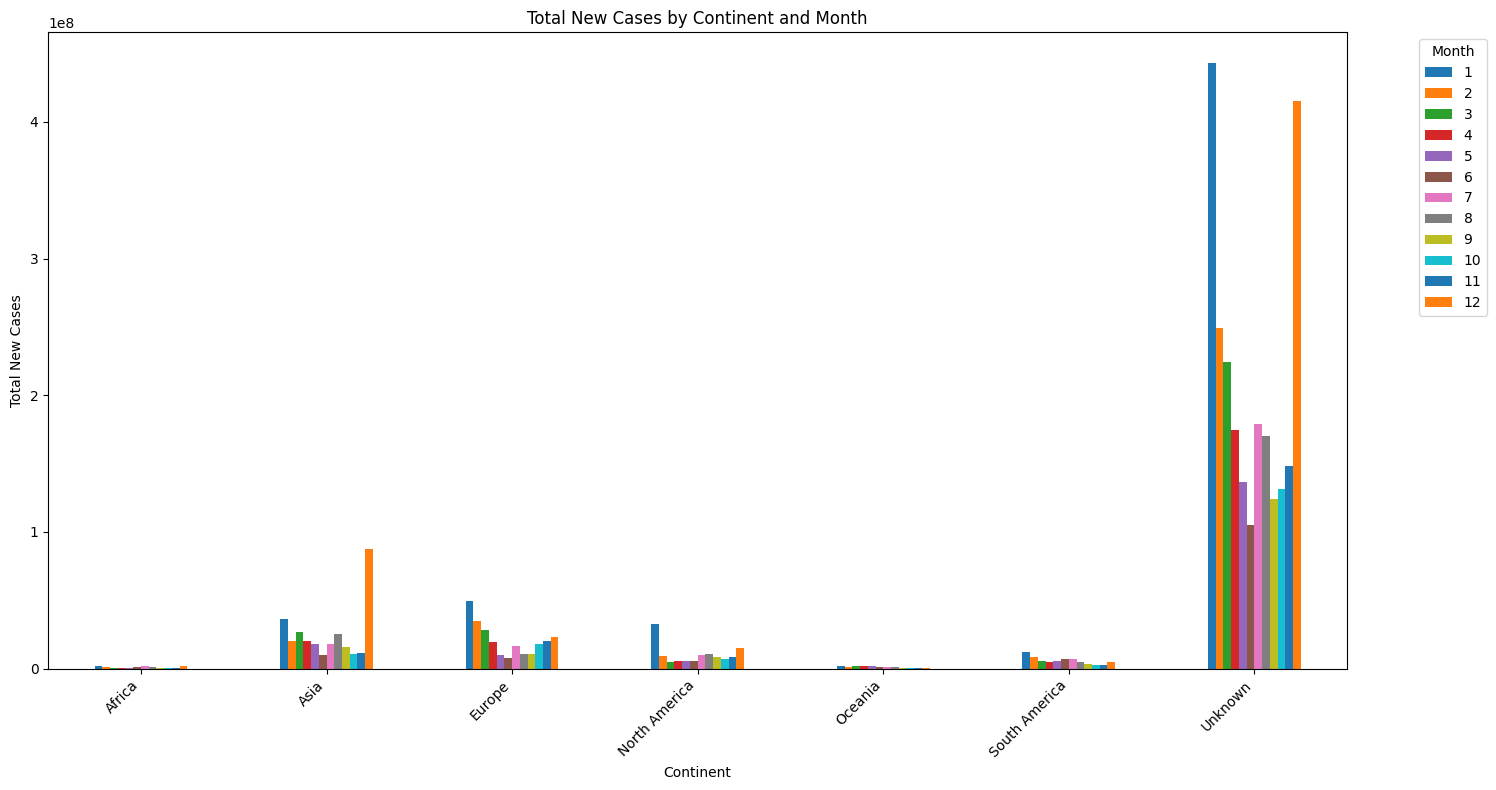

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
"""Activity 4: Regional Analysis
Unveiling regional nuances in COVID-19 dynamics and identifying patterns in case distribution and fatality across time and continents."""
# 1.	Create a grouped bar chart to visualize new cases by continent and month.
print("1.	Create a grouped bar chart to visualize new cases by continent and month. ")

# Ensure 'new_cases' is numeric and handle potential non-numeric entries
CovidDatam['new_cases'] = pd.to_numeric(CovidDatam['new_cases'], errors='coerce')

# Fill any resulting NaNs with the median (or 0, depending on how you want to represent missing new cases)
# Let's fill with 0 for new cases as NaN might indicate no new cases reported.
CovidDatam['new_cases'] = CovidDatam['new_cases'].fillna(0)


# Group by continent and month, and sum the new cases
monthly_continent_new_cases = CovidDatam.groupby(['continent', 'month'])['new_cases'].sum().unstack()

# Create the grouped bar chart
ax = monthly_continent_new_cases.plot(kind='bar', figsize=(15, 8))

plt.xlabel('Continent') # Set the label for the x-axis
plt.ylabel('Total New Cases') # Set the label for the y-axis
plt.title('Total New Cases by Continent and Month') # Set the title of the plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left') # Add a legend outside the plot

plt.tight_layout() # Adjust layout
plt.show() # Display the plot
plt.figure(figsize=(12, 6))

2.       Visualize the distribution of total COVID-19 cases by year using a box plot.  


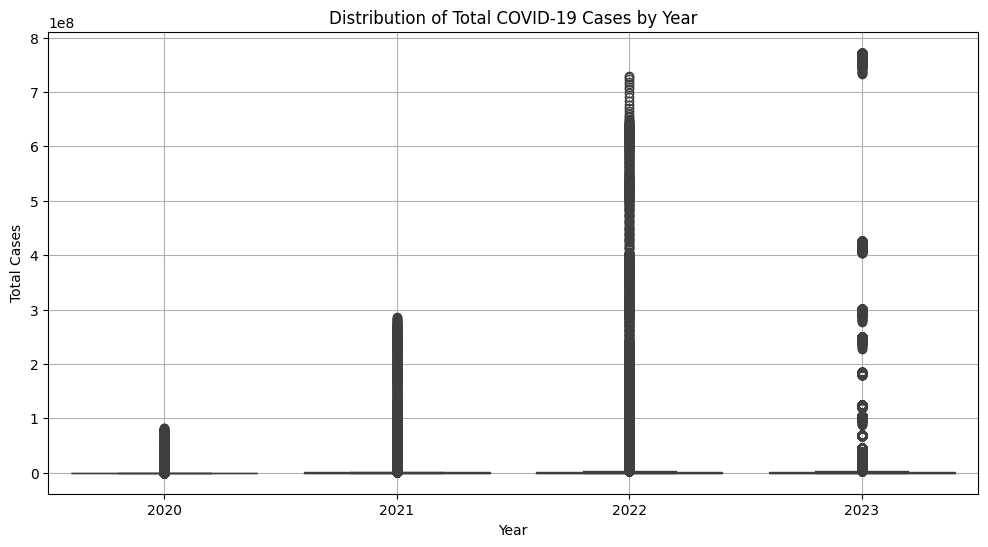

In [ ]:
"""Activity 4: Regional Analysis - Distribution of Total Cases by Year"""
# 2. Visualize the distribution of total COVID-19 cases by year using a box plot.
print("2.Visualize the distribution of total COVID-19 cases by year using a box plot.  ")
plt.figure(figsize=(12, 6)) # Create a figure for the plot
sns.boxplot(x='year', y='total_cases', data=CovidData) # Create the box plot using seaborn with 'year' on x and 'total_cases' on y
plt.xlabel('Year') # Set the label for the x-axis
plt.ylabel('Total Cases') # Set the label for the y-axis
plt.title('Distribution of Total COVID-19 Cases by Year') # Set the title of the plot
plt.grid(True) # Add a grid
plt.show() # Display the plot

Compare total deaths across different continents using a bar plot.  


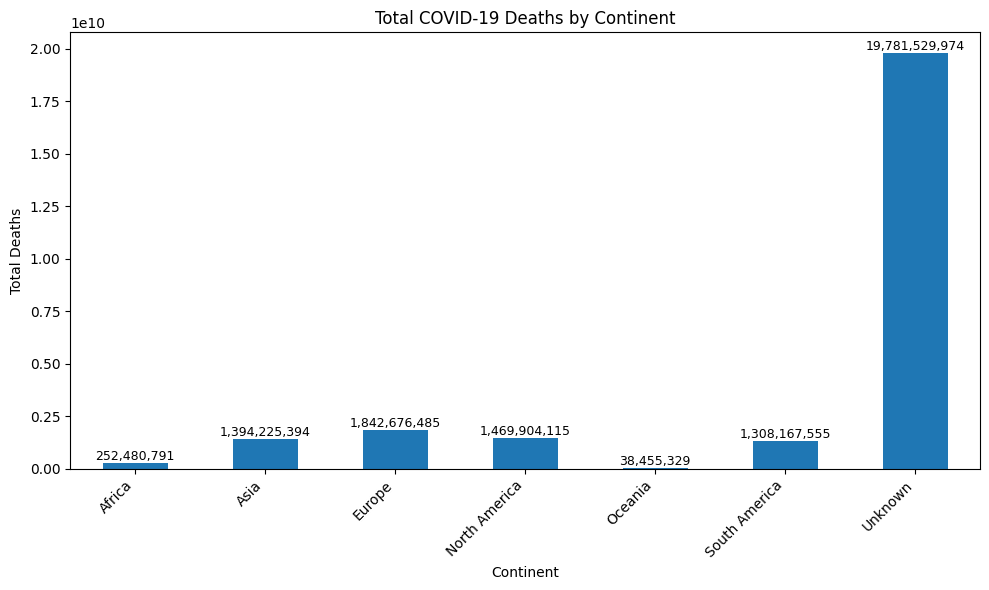

In [ ]:
"""4.3. Compare total deaths across different continents using a bar plot.  """
print("Compare total deaths across different continents using a bar plot.  ")

# Ensure 'total_deaths' is numeric and handle potential non-numeric entries
CovidDatam['total_deaths'] = pd.to_numeric(CovidDatam['total_deaths'], errors='coerce')

# Fill any resulting NaNs with the median
CovidDatam['total_deaths'] = CovidDatam['total_deaths'].fillna(CovidDatam['total_deaths'].median())


# Group by continent and sum the total deaths
continent_deaths = CovidDatam.groupby('continent')['total_deaths'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = continent_deaths.plot(kind='bar')

plt.xlabel('Continent') # Set the label for the x-axis
plt.ylabel('Total Deaths') # Set the label for the y-axis
plt.title('Total COVID-19 Deaths by Continent') # Set the title of the plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=9)


plt.tight_layout() # Adjust layout
plt.show() # Display the plot

4.4.     Analyze the total cases on a month-by-month basis using a bar plot


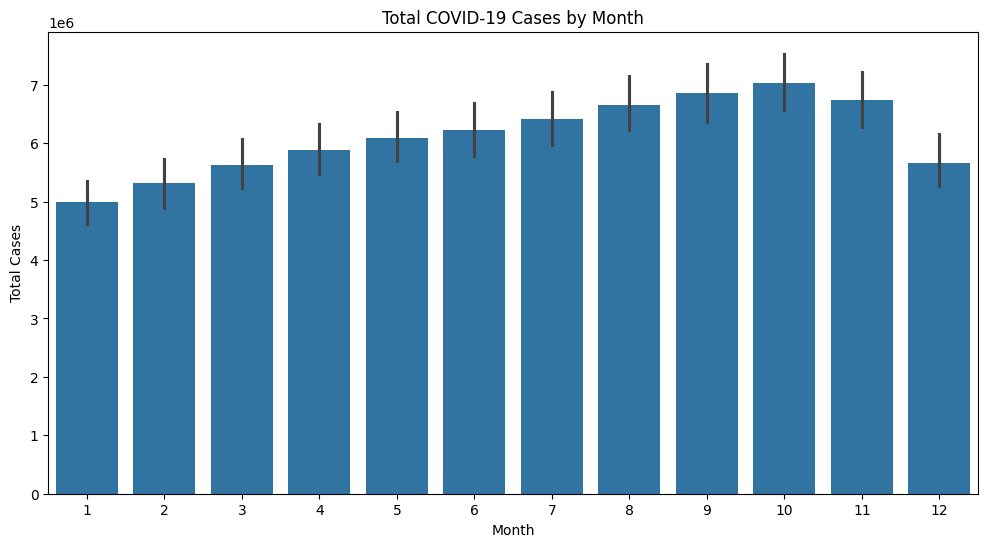

In [ ]:
"""4.4. Analyze the total cases on a month-by-month basis using a bar plot.  """
print("4.4.     Analyze the total cases on a month-by-month basis using a bar plot")

# Ensure 'total_cases' is numeric and handle potential non-numeric entries
# Convert to numeric, coercing errors to NaN
CovidDatam['total_cases'] = pd.to_numeric(CovidDatam['total_cases'], errors='coerce')

# Fill any resulting NaNs with the median of the now numeric column
CovidDatam['total_cases'] = CovidDatam['total_cases'].fillna(CovidDatam['total_cases'].median())


plt.figure(figsize=(12, 6)) # Create a figure for the plot
sns.barplot(x='month', y='total_cases', data=CovidDatam) # Create the bar plot using seaborn with 'month' on x and 'total_cases on y
plt.xlabel('Month') # Set the label for the x-axis
plt.ylabel('Total Cases') # Set the label for the y-axis
plt.title('Total COVID-19 Cases by Month') # Set the title of the plot
plt.show() # Display the plot

1.       Explore the daily trend of new cases and new deaths globally using line plots. 


<Figure size 1500x800 with 0 Axes>

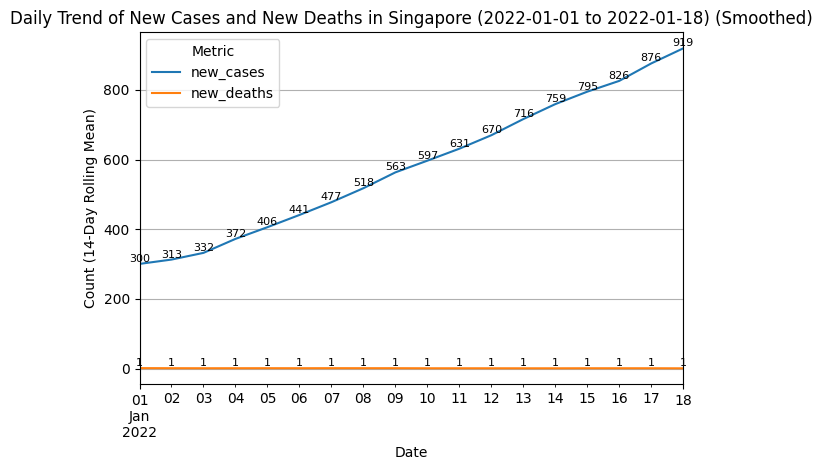

In [ ]:
"""Activity 5: Time Series Analysis
Capturing the daily dynamics of COVID-19, assessing the impact of vaccination, and monitoring testing metrics for a comprehensive global overview.
1.      Explore the daily trend of new cases and new deaths globally using line plots.
"""
print("1.       Explore the daily trend of new cases and new deaths globally using line plots. ")
import numpy as np # Import numpy
plt.figure(figsize=(15, 8)) # Increased figure size

# Ensure 'new_cases' and 'new_deaths' are numeric and handle potential non-numeric entries
CovidDatam['new_cases'] = pd.to_numeric(CovidDatam['new_cases'], errors='coerce')
CovidDatam['new_deaths'] = pd.to_numeric(CovidDatam['new_deaths'], errors='coerce')

# Fill any resulting NaNs with 0 for new cases and deaths
CovidDatam['new_cases'] = CovidDatam['new_cases'].fillna(0)
CovidDatam['new_deaths'] = CovidDatam['new_deaths'].fillna(0)

# --- Filter for a specific location ---
analysis_location = 'Singapore' # Specify the continent or country (e.g., 'Europe', 'United States', 'India')
location_data = CovidDatam[CovidDatam['location'] == analysis_location].copy()


# Group by date and sum new cases and new deaths for the selected location
daily_location_trends = location_data.groupby('date')[['new_cases', 'new_deaths']].sum()

# Apply a rolling average for smoothing (e.g., a 7-day rolling average)
window_size = 14 # You can adjust the window size
smoothed_daily_trends = daily_location_trends.rolling(window=window_size).mean()

# --- Filter for a specific time period ---
start_date = '2022-01-01' # Specify the start date
end_date = '2022-01-18' # Specify the end date - Corrected invalid date

# Make sure the index is datetime for filtering
if not pd.api.types.is_datetime64_any_dtype(smoothed_daily_trends.index):
     smoothed_daily_trends.index = pd.to_datetime(smoothed_daily_trends.index)

smoothed_daily_trends_period = smoothed_daily_trends.loc[start_date:end_date].copy()


# Create a line plot for the smoothed daily trends within the period for the location
ax = smoothed_daily_trends_period.plot(kind='line', linestyle='-') # Plot smoothed data for the specified period


plt.xlabel('Date') # Set the label for the x-axis
plt.ylabel(f'Count ({window_size}-Day Rolling Mean)') # Update y-label to indicate smoothing
plt.title(f'Daily Trend of New Cases and New Deaths in {analysis_location} ({start_date} to {end_date}) (Smoothed)') # Update title with location and period
plt.grid(True) # Add a grid
plt.legend(title='Metric') # Add a legend

# Add labels to the smoothed data points within the period with conditional formatting (Thousands, Millions, or Billions)
for line in ax.lines:
    for x_val, y_val_raw in zip(line.get_xdata(), line.get_ydata()):
        # Explicitly convert to float and check for NaN
        y_val = float(y_val_raw)
        if not pd.isna(y_val):
            if y_val >= 1_000_000_000: # If value is 1 billion or more
                label = f'{y_val/1_000_000_000:,.1f}B' # Format in Billions
            elif y_val >= 1_000_000: # If value is 1 million or more
                label = f'{y_val/1_000_000:,.1f}M' # Format in Millions
            elif y_val >= 1_000: # If value is 1 thousand or more
                 label = f'{y_val/1_000:,.1f}K' # Format in Thousands
            else:
                label = f'{y_val:,.0f}' # Format smaller values

            # Adjust vertical alignment slightly for better readability based on line color/order if needed
            # For simplicity, let's keep a consistent vertical alignment for now
            ax.text(x_val, y_val, label, ha='center', va='bottom', fontsize=8)


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#2.     Calculate and visualise the daily average of new cases and deaths globally.
print("2.       Calculate and visualise the daily average of new cases and deaths globally.  ")

# Ensure 'new_cases' and 'new_deaths' are numeric and handle potential non-numeric entries
CovidDatam['new_cases'] = pd.to_numeric(CovidDatam['new_cases'], errors='coerce')
CovidDatam['new_deaths'] = pd.to_numeric(CovidDatam['new_deaths'], errors='coerce')

# Fill any resulting NaNs with 0 for new cases and deaths (assuming 0 new cases/deaths if not reported)
CovidDatam['new_cases'] = CovidDatam['new_cases'].fillna(0)
CovidDatam['new_deaths'] = CovidDatam['new_deaths'].fillna(0)

# Group by date and calculate the average of new cases and new deaths globally
daily_global_averages = CovidDatam.groupby('date')[['new_cases', 'new_deaths']].mean()

# --- Modifications to focus on a shorter period and smooth the data ---

# Filter for a recent time period (e.g., the last year)
# Make sure 'date' is datetime type first (should be if cell OJHruDcwdcBh was run)
if not pd.api.types.is_datetime64_any_dtype(daily_global_averages.index):
    daily_global_averages.index = pd.to_datetime(daily_global_averages.index)

start_date = daily_global_averages.index.max() - pd.Timedelta(days=365) # Start date one year before the latest date
recent_daily_averages = daily_global_averages[daily_global_averages.index >= start_date].copy()


# Apply a rolling average for smoothing (e.g., a 7-day rolling average)
window_size = 7
smoothed_daily_averages = recent_daily_averages.rolling(window=window_size).mean()

# --- Plot the smoothed data ---

plt.figure(figsize=(12, 6))
ax = smoothed_daily_averages.plot(kind='line', linestyle='-') # Plot smoothed data


plt.xlabel('Date') # Set the label for the x-axis
plt.ylabel(f'Average Count ({window_size}-Day Rolling Mean)') # Update y-label to indicate smoothing
plt.title('Worldwide Daily Average of New Cases and New Deaths (Smoothed)') # Update title
plt.grid(True) # Add a grid
plt.legend(title='Metric') # Add a legend
plt.tight_layout() # Adjust layout

# Optional: Add labels to smoothed data points (less cluttered than daily labels)
# You might still want to be selective about which labels to add if there are many points
# For now, let's not add labels to avoid clutter unless specifically requested again.

print()
plt.show() # Display the plot

Explore the trend of vaccination coverage over time globally


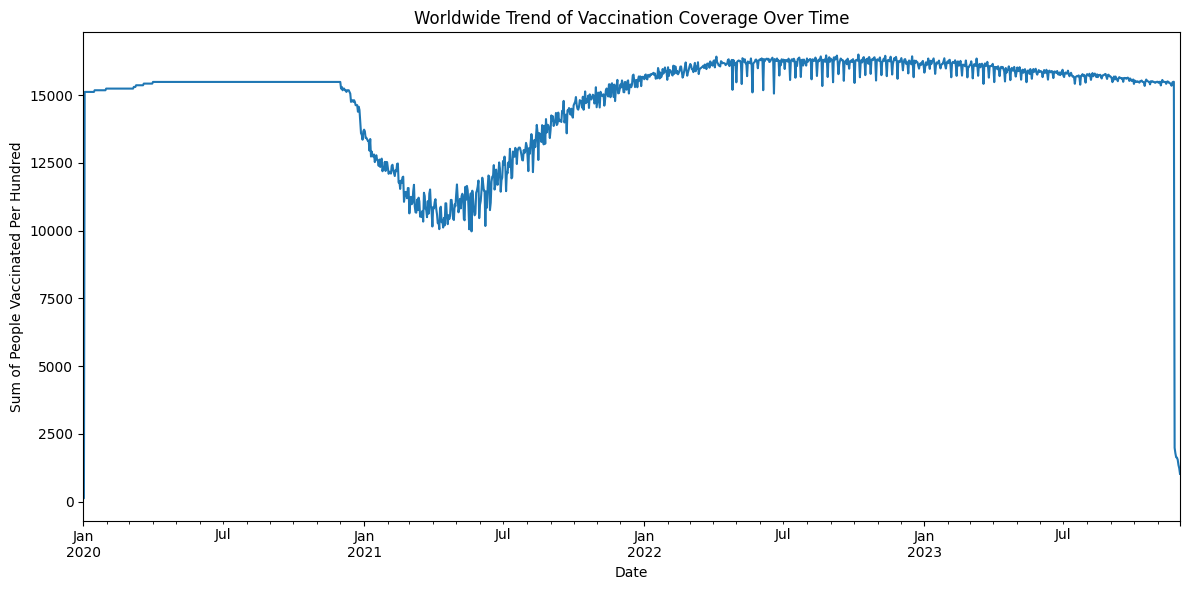

In [ ]:
"""5.3. Explore the trend of vaccination coverage over time globally"""
print("Explore the trend of vaccination coverage over time globally")

# Ensure 'people_vaccinated_per_hundred' is numeric and handle potential non-numeric entries
# This column is a good indicator of vaccination coverage relative to population size
CovidDatam['people_vaccinated_per_hundred'] = pd.to_numeric(CovidDatam['people_vaccinated_per_hundred'], errors='coerce')

# Fill any resulting NaNs with 0 (assuming no vaccination coverage if not reported)
CovidDatam['people_vaccinated_per_hundred'] = CovidDatam['people_vaccinated_per_hundred'].fillna(0)

# Group by date and sum the 'people_vaccinated_per_hundred' globally
# Summing 'per hundred' across locations might not be the most statistically correct global coverage,
# but it gives an indication of the trend of reported coverage levels globally over time.
# A more accurate global coverage would require total vaccinated / total population, which is more complex.
# Let's plot the sum of 'people_vaccinated_per_hundred' as an indicator of reported coverage trend.
global_vaccination_trend = CovidDatam.groupby('date')['people_vaccinated_per_hundred'].sum()


# Create a line plot for the global vaccination trend
plt.figure(figsize=(12, 6))
ax = global_vaccination_trend.plot(kind='line', linestyle='-')


plt.xlabel('Date') # Set the label for the x-axis
plt.ylabel('Sum of People Vaccinated Per Hundred') # Set the label for the y-axis
plt.title('Worldwide Trend of Vaccination Coverage Over Time') # Set the title of the plot
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

Analyze the total tests and positive rate over time globally.


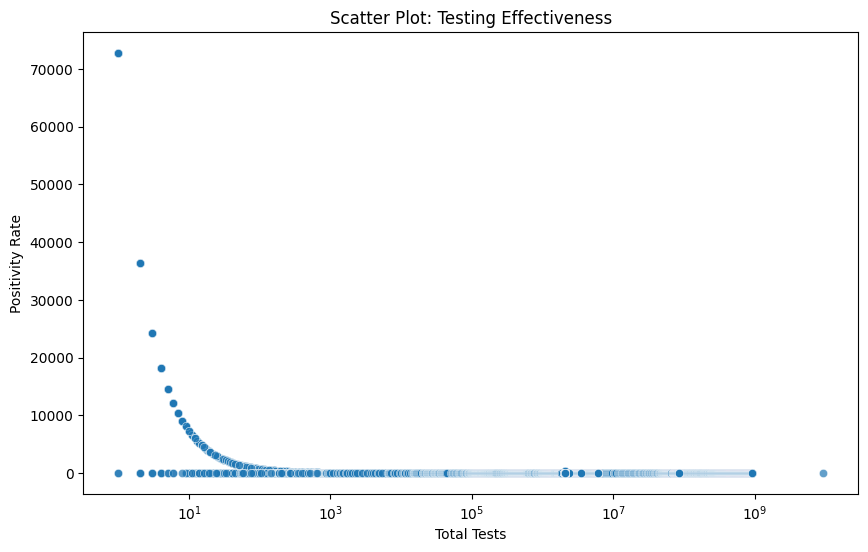

In [ ]:
import seaborn as sns
# 5.4	Analyze the total tests and positive rate over time globally.
print("Analyze the total tests and positive rate over time globally.")
# Ensure columns are numeric and handle NaNs before calculation
CovidDatam['total_cases'] = pd.to_numeric(CovidDatam['total_cases'], errors='coerce')
CovidDatam['total_tests'] = pd.to_numeric(CovidDatam['total_tests'], errors='coerce')

# Fill NaNs resulting from coercion with the median (or another suitable value)
CovidDatam['total_cases'] = CovidDatam['total_cases'].fillna(CovidDatam['total_cases'].median())
CovidDatam['total_tests'] = CovidDatam['total_tests'].fillna(CovidDatam['total_tests'].median())


CovidDatam['positivity_rate'] = CovidDatam['total_cases'] / CovidDatam['total_tests']

# Create a scatter plot for testing effectiveness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_tests', y='positivity_rate', data=CovidDatam, alpha=0.7)
plt.title('Scatter Plot: Testing Effectiveness')
plt.xlabel('Total Tests')
plt.ylabel('Positivity Rate')
plt.xscale('log')  # Use a logarithmic scale for better visualization if values vary widely
plt.show()

The heatmap shows the correlation matrix for 'total_deaths' and 'total_cases'. The key value is the correlation coefficient between 'total_deaths' and 'total_cases', which is approximately 0.94.

This value of 0.94 is very close to +1, indicating a very strong positive linear correlation between the total number of COVID-19 cases and the total number of COVID-19 deaths in your dataset. This is an expected finding, as generally, a higher number of cases in a region or over time will lead to a higher number of deaths.

In summary, this heatmap visually confirms that as the total reported cases of COVID-19 increase, the total reported deaths also tend to increase significantly.

Visualize a specific country's total COVID-19 cases and deaths over time.  


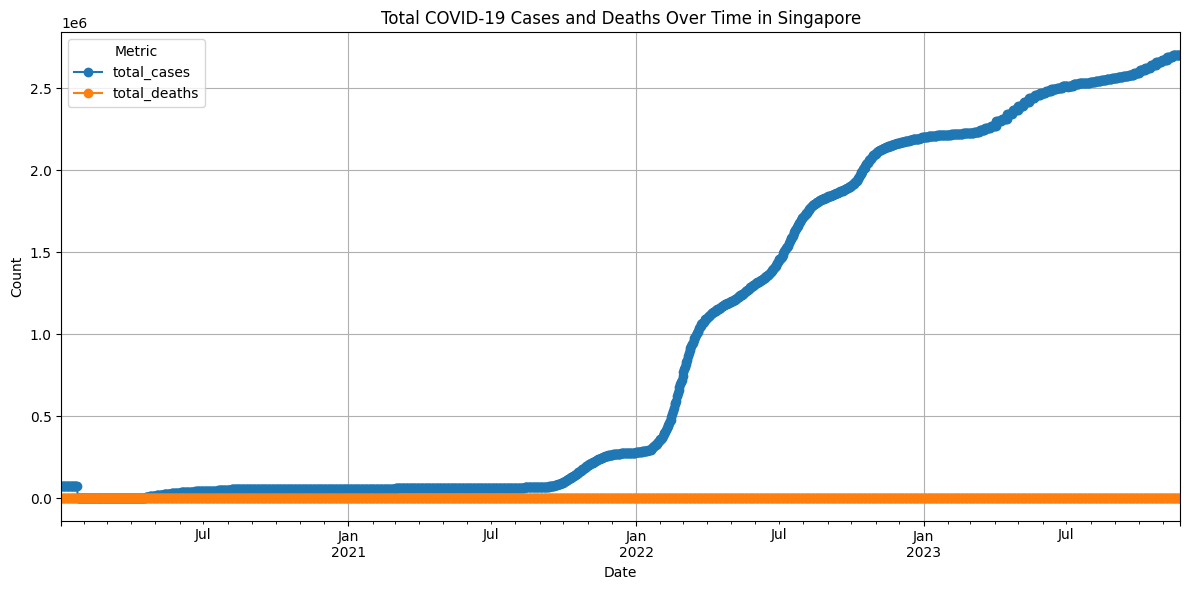

In [ ]:
"""Activity 6: In-Depth Country Analysis
Conducting an in-depth examination of specific countries, understanding the correlation between cases and deaths globally, and exploring continental variations in case distribution.
1.      Visualize a specific country's total COVID-19 cases and deaths over time.  """
print("Visualize a specific country's total COVID-19 cases and deaths over time.  ")
plt.figure(figsize=(12, 6)) # Create a figure for the plot

# Specify the country you want to analyze
analysis_country = 'Singapore' # You can change this to any country in your dataset

# Filter the DataFrame for the specified country
country_data = CovidDatam[CovidDatam['location'] == analysis_country].copy()

# Ensure 'total_cases' and 'total_deaths' are numeric and handle potential non-numeric entries
country_data['total_cases'] = pd.to_numeric(country_data['total_cases'], errors='coerce')
country_data['total_deaths'] = pd.to_numeric(country_data['total_deaths'], errors='coerce')

# Fill any resulting NaNs with the median for this country's data
country_data['total_cases'] = country_data['total_cases'].fillna(country_data['total_cases'].median())
country_data['total_deaths'] = country_data['total_deaths'].fillna(country_data['total_deaths'].median())

# Create line plots for total cases and total deaths over time for the country
ax = country_data.plot(x='date', y=['total_cases', 'total_deaths'], ax=plt.gca(), marker='o', linestyle='-')


plt.xlabel('Date') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.title(f'Total COVID-19 Cases and Deaths Over Time in {analysis_country}') # Set the title with the country name
plt.grid(True) # Add a grid
plt.legend(title='Metric') # Add a legend
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

Investigate the correlation between cases and deaths within a specific country.


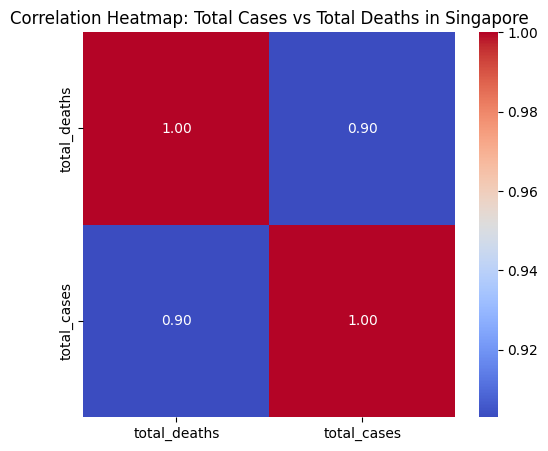

In [ ]:
"""Activity 6: In-Depth Country Analysis - Correlation within a Country"""
# 6.1Investigate the correlation between cases and deaths within a specific country.
print("Investigate the correlation between cases and deaths within a specific country.")

import seaborn as sns # Import seaborn

# Specify the country for correlation analysis
analysis_country_corr = 'Singapore' # Change this to the country you want to analyze

# Filter data for the specified country
country_data_corr = CovidDatam[CovidDatam['location'] == analysis_country_corr].copy()

# Select the columns for correlation and ensure they are numeric
correlation_data_country = country_data_corr[['total_deaths', 'total_cases']].copy()
correlation_data_country['total_deaths'] = pd.to_numeric(correlation_data_country['total_deaths'], errors='coerce')
correlation_data_country['total_cases'] = pd.to_numeric(correlation_data_country['total_cases'], errors='coerce')

# Fill NaNs resulting from coercion with the median for this country's data
correlation_data_country['total_deaths'] = correlation_data_country['total_deaths'].fillna(correlation_data_country['total_deaths'].median())
correlation_data_country['total_cases'] = correlation_data_country['total_cases'].fillna(correlation_data_country['total_cases'].median())


# Calculate the correlation matrix for the country
correlation_matrix_country = correlation_data_country.corr()

# Create the heatmap
plt.figure(figsize=(6, 5)) # Adjust figure size if needed
sns.heatmap(correlation_matrix_country, annot=True, cmap='coolwarm', fmt=".2f") # Use sns.heatmap and format annotations
plt.title(f'Correlation Heatmap: Total Cases vs Total Deaths in {analysis_country_corr}') # Update title with country name
plt.show()

In [ ]:
"""6.2. Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user-selected values. """
print("Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user-selected values. ")

# Get user input for the country
user_country = input("Enter the country name (e.g., Singapore, United States, India): ")

# Get user input for the metric
user_metric = input("Enter the metric to plot ('total_cases' or 'total_deaths'): ")

# Validate country input
if user_country not in CovidDatam['location'].unique():
    print(f"Error: '{user_country}' not found in the dataset. Please enter a valid country name.")
else:
    # Validate metric input
    if user_metric not in ['total_cases', 'total_deaths']:
        print(f"Error: Invalid metric '{user_metric}'. Please enter 'total_cases' or 'total_deaths'.")
    else:
        # Filter data for the selected country
        country_data_selected = CovidDatam[CovidDatam['location'] == user_country].copy()

        # Ensure the selected metric column is numeric and handle potential non-numeric entries
        country_data_selected[user_metric] = pd.to_numeric(country_data_selected[user_metric], errors='coerce')

        # Fill any resulting NaNs with the median for this country's data and selected metric
        country_data_selected[user_metric] = country_data_selected[user_metric].fillna(country_data_selected[user_metric].median())


        # Create a line plot for the user-selected metric over time for the country
        plt.figure(figsize=(12, 6))
        ax = country_data_selected.plot(x='date', y=user_metric, ax=plt.gca(), marker='o', linestyle='-')

        plt.xlabel('Date') # Set the label for the x-axis
        plt.ylabel(user_metric.replace('_', ' ').title()) # Set the label for the y-axis (formatted)
        plt.title(f'{user_metric.replace("_", " ").title()} Over Time in {user_country}') # Set the title

        plt.tight_layout() # Adjust layout
        plt.show() # Display the plot

        # Optional: Add labels to the data points (can be cluttered for long time series)
        for x, y in zip(country_data_selected['date'], country_data_selected[user_metric]):
            # Format label based on value magnitude (optional)
            if y >= 1_000_000_000:
                label = f'{y/1_000_000_000:,.1f}B'
            elif y >= 1_000_000:
                label = f'{y/1_000_000:,.1f}M'
            elif y >= 1_000:
                label = f'{y/1_000:,.1f}K'
            else:
                label = f'{y:,.0f}'
            ax.text(x, y, label, ha='center', va='bottom', fontsize=8)

Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user-selected values. 


In [ ]:
"""6.3. Analyze the distribution of total cases across different continents using a box plot.  """
print("Analyze the distribution of total cases across different continents using a box plot.  ")

import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt # Import matplotlib.pyplot (needed for plt.figure, plt.xlabel, etc.)

# Ensure 'total_cases' is numeric and handle potential non-numeric entries
CovidDatam['total_cases'] = pd.to_numeric(CovidDatam['total_cases'], errors='coerce')
CovidDatam['total_cases'] = CovidDatam['total_cases'].fillna(CovidDatam['total_cases'].median())


plt.figure(figsize=(12, 6)) # Create a figure for the plot
sns.boxplot(x='continent', y='total_cases', data=CovidDatam) # Create the box plot using seaborn with 'continent' on x and 'total_cases' on y

plt.xlabel('Continent') # Set the label for the x-axis
plt.ylabel('Total Cases') # Set the label for the y-axis
plt.title('Distribution of Total COVID-19 Cases by Continent') # Set the title of the plot
plt.grid(True) # Add a grid
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

In [ ]:
"""	6.4Visualize the Year wise monthly trend of new COVID-19 cases for user's selected country.  """
print("Visualize the Year wise monthly trend of new COVID-19 cases for user's selected country.  ")
# Get user input for the country
user_country_monthly = input("Enter the country name to visualize monthly trends (e.g., Singapore, United States, India): ")

# Validate country input
if user_country_monthly not in CovidDatam['location'].unique():
    print(f"Error: '{user_country_monthly}' not found in the dataset. Please enter a valid country name.")
else:
    # Filter data for the selected country
    country_data_monthly = CovidDatam[CovidDatam['location'] == user_country_monthly].copy()

    # Ensure 'new_cases' is numeric and handle potential non-numeric entries
    country_data_monthly['new_cases'] = pd.to_numeric(country_data_monthly['new_cases'], errors='coerce')

    # Fill any resulting NaNs with 0 for new cases (assuming 0 new cases if not reported)
    country_data_monthly['new_cases'] = country_data_monthly['new_cases'].fillna(0)

    # Group by year and month, and sum the new cases
    monthly_new_cases_by_year = country_data_monthly.groupby(['year', 'month'])['new_cases'].sum().unstack()

    # Create line plots for the monthly new cases for each year
    plt.figure(figsize=(12, 8))
    ax = monthly_new_cases_by_year.plot(kind='line', marker='o', ax=plt.gca())

    plt.xlabel('Month') # Set the label for the x-axis
    plt.ylabel('Total New Cases') # Set the label for the y-axis
    plt.title(f'Year-wise Monthly Trend of New COVID-19 Cases in {user_country_monthly}') # Set the title with the country name
    plt.grid(True) # Add a grid
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') # Add a legend outside the plot

    plt.tight_layout() # Adjust layout
    plt.show() # Display the plot

In [ ]:
"""Activity 7: Additional Insights
Extracting additional insights, examining the influence of external factors, and evaluating regional disparities for a holistic understanding of the COVID-19 landscape.
1.	Visualize the fatality rate (total deaths / total cases) over time globally.  """
print("Visualize the fatality rate (total deaths / total cases) over time globally.  ")

fatality_rate= CovidDatam['total_deaths'] / CovidDatam['total_cases']
CovidDatam['fatality_rate'] = fatality_rate
plt.figure(figsize=(12, 6))
ax = CovidDatam.plot(x='date', y='fatality_rate', ax=plt.gca(), marker='o', linestyle='-')
plt.xlabel('Date') # Set the label for the x-axis
plt.ylabel('Fatality Rate') # Set the label for the y-axis
plt.title('Fatality Rate Over Time') # Set the title of the plot
plt.show()